## Improving Model Accuracy Using Hyper parameter tuning

Three ways to improve model hyperparameters

    (1) Manually adjusting parameters
    (2) Randomly with RandomSearchCV
    (3) Exhaustively with GridSearchCV

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score



In [7]:
## (1) Manually
hd = pd.read_csv('heart-disease.csv')

In [16]:
def evaluate_preds(Y_true,Y_preds):
    accuracy = accuracy_score(Y_true,Y_preds)
    precision = precision_score(Y_true,Y_preds)
    recall = recall_score(Y_true,Y_preds)
    f1 = f1_score(Y_true,Y_preds)
    
    metrics = {"Accuracy" : accuracy,
              "Precision" : precision,
              "Recall" : recall,
              "F1" : f1}
    
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1: {f1 * 100:.2f}%")
    
    return metrics

In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)
hd_shuffle = hd.sample(frac=1)

In [17]:
#Split into X,Y

X = hd_shuffle.drop("target",axis=1)
Y = hd_shuffle["target"]

#Split into train,test,validation Set
train_split = round(0.7 * len(hd_shuffle))
validation_split = round(train_split +0.15 * len(hd_shuffle))
X_train,Y_train = X[:train_split] , Y[:train_split]
X_valid,Y_valid = X[train_split:validation_split],Y[train_split:validation_split]

X_test,Y_test = X[validation_split:],Y[validation_split:]

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

## Make baseline predictions using X_valid
y_preds = clf.predict(X_valid)

## Evaluate the classifier on vlidation set
baseline_metrics = evaluate_preds(Y_valid,y_preds)

Accuracy: 64.44%
Precision: 77.78%
Recall: 53.85%
F1: 63.64%


C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
## Tuning Hyperparameters
np.random.seed(2)

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,Y_train)

## Make baseline predictions using X_valid
y_preds_2 = clf_2.predict(X_valid)

## Evaluate the classifier on validation set
metrics_2 = evaluate_preds(Y_valid,y_preds_2)

Accuracy: 77.78%
Precision: 86.36%
Recall: 73.08%
F1: 79.17%


In [19]:
### Randomized Search CV

In [22]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(2)

X = hd_shuffle.drop("target",axis=1)
Y = hd_shuffle["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

# Fit Ramdomized Search CV
rs_clf.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   0.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, ma

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.8s
[CV] n_estimators=1200, min_samples_split=6, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished
C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [23]:
rs_clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [24]:
# Make preiction based on best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate predictions
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accuracy: 83.61%
Precision: 83.33%
Recall: 88.24%
F1: 85.71%


### Using GridSearchCV
Grid Search CV will go through each of the combinations and find the best fit
Randomized will limit it to number of iterations specified in n_iter

In [26]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [27]:
grid_2 = {
    'n_estimators': [200, 500, 1000, 1200],
     'max_depth': [5, 10, 20, 30],
     'max_features': ['auto'],
     'min_samples_split': [2, 4, 6],
     'min_samples_leaf': [1, 2, 4]
}

In [30]:
from sklearn.model_selection import GridSearchCV

np.random.seed(2)

X = hd_shuffle.drop("target",axis=1)
Y = hd_shuffle["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit Grid Search CV
gs_clf.fit(X_train,Y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=4, min_

[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500, total=   0.9s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500, total=   1.1s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.5s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500 
[CV]  max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=500, total=   1.0s
[CV] max_depth=20, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=500, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500, total=   1.0s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.3s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   0.4s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=500, total=   0.8s
[CV] max_depth=30, max_features=auto, min_samples_le

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 16.3min finished
C:\Users\SAN.000\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [31]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [32]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(Y_test,gs_y_preds)

Accuracy: 83.61%
Precision: 83.33%
Recall: 88.24%
F1: 85.71%


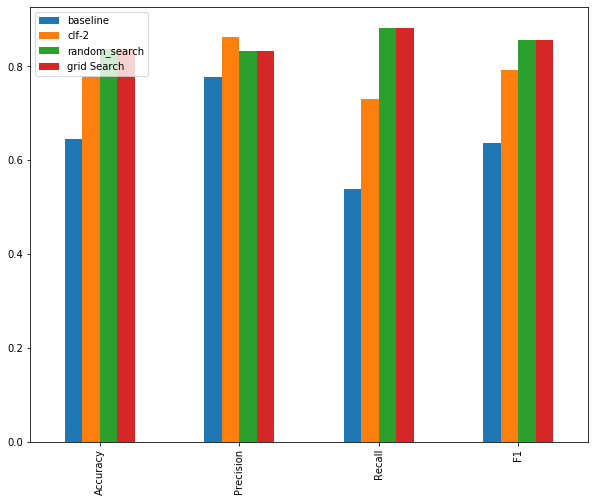

In [34]:
## Comparing the different model metrics

compare_metrics = pd.DataFrame({
    
    "baseline":baseline_metrics,
    "clf-2": metrics_2,
    "random_search": rs_metrics,
    "grid Search":gs_metrics
})
compare_metrics.plot.bar(figsize=(10,8));

In [35]:
### Saving a Model and loading back using Pickle

In [36]:
import pickle

pickle.dump(gs_clf,open("save_gridsearch.pkl","wb"))

In [37]:
load_pickle = pickle.load(open("save_gridsearch.pkl","rb"))

In [38]:
pickle_preds = load_pickle.predict(X_test)
evaluate_preds(Y_test,pickle_preds)

Accuracy: 83.61%
Precision: 83.33%
Recall: 88.24%
F1: 85.71%


{'Accuracy': 0.8360655737704918,
 'Precision': 0.8333333333333334,
 'Recall': 0.8823529411764706,
 'F1': 0.8571428571428571}

In [39]:
# Using joblib module for saving and loading model

In [40]:
from joblib import dump,load

dump(gs_clf, filename="joblib_gs.joblib")

['joblib_gs.joblib']

In [41]:
load_joblib = load(filename="joblib_gs.joblib")